# Project - Tamil Handwritten Character Recognition

In [ ]:
import pandas as pd  # Import pandas library for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical computations
import tensorflow as tf  # Import TensorFlow for building and training deep learning models
from tensorflow import keras  # Import Keras, the high-level API of TensorFlow
from keras import layers, models  # Import layers and models from Keras for building neural networks
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img  # Import ImageDataGenerator for data augmentation
from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn for splitting data
import matplotlib.image as mpimg  # Import matplotlib.image for loading and displaying images
import zipfile  # Import zipfile for working with zip files
import os  # Import os for interacting with the operating system

In [ ]:
# Path to the ZIP file containing the dataset of Tamil characters
DATASET_ZIP = 'tamil_characters.zip'

# Shape of the input images in the dataset
# Each image is assumed to have dimensions of 120x120 pixels and a single channel (grayscale)
IMAGE_SHAPE = (120, 120, 1)

## Data Preparation

Extract the data:

In [ ]:
# Open the ZIP file containing the dataset in read mode
# Extract all the contents of the ZIP file to the 'data' directory
with zipfile.ZipFile(DATASET_ZIP, 'r') as z:
    z.extractall('data')

# Rename the extracted directory from 'shuffled' to 'train'
os.rename('data/shuffled', 'data/train')

In [ ]:
# Define the path to the train data directory
TRAIN_PATH = 'data/train'

In [ ]:
# Open the ZIP file containing the dataset in read mode
# Extract all the contents of the ZIP file to the 'data' directory
with zipfile.ZipFile(DATASET_ZIP, 'r') as z:
  z.extractall('data')

# Rename the extracted directory from 'shuffled' to 'test'
os.rename('data/shuffled', 'data/test')

# Define the path to the test data directory
TEST_PATH = 'data/test'

### Creating a Dataframe
Creating a dataframe that contains the image file names and its associated class.


In [ ]:

# Get the list of filenames in the training directory
files = os.listdir(TRAIN_PATH)

# Initialize an empty list to store the extracted categories
categories = []

# Iterate through each filename in the list of files
for filename in files:
    # Check if the filename contains an underscore
    if '_' in filename:
        # Split the filename by underscore to extract parts
        filename_parts = filename.split('_')

        # Select the second part of the split result, which represents the category
        category_part = filename_parts[1]

        # Remove the last 8 characters from the category part to exclude the '_tXX.tif' part,
        # where XX represents the category
        category = category_part[:-8]
    else:
        # If the filename does not contain an underscore, set category to None
        category = None

    # Append the extracted category to the list of categories
    categories.append(category)

# Create a DataFrame using filenames and their corresponding categories
df = pd.DataFrame({'filename': files, 'category': categories})


In [ ]:
# Print the number of unique character categories in the DataFrame
print('Number of unique characters: {}'.format(df['category'].unique()))

# Display the first few rows of the DataFrame
df.head()

Number of unique characters: ['007' '008' '010' '009' '004' '002' '003' '001' '000' '006' '005' '155']


,filename,category
0,u49_007t01.tiff,007
1,u16_008t10.tiff,008
2,u18_010t08.tiff,010
3,u30_009t10.tiff,009
4,u18_007t01.tiff,007


There are twelve vowels in Tamil, and there are twelve target values here.

We know that there are twelve classes, one for each charcter, but we dont know which class maps to which character. So, lets print one image of each class, and use that to create a dictionary that maps the class with the unicode value of that character.

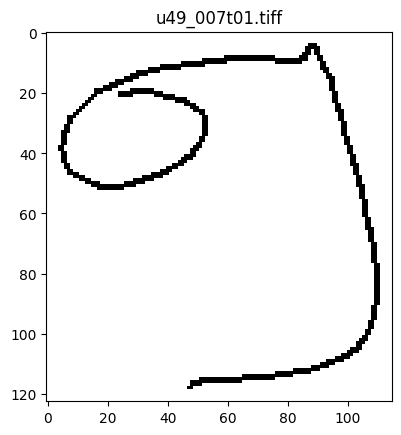

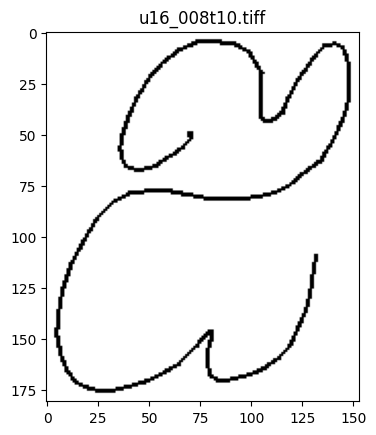

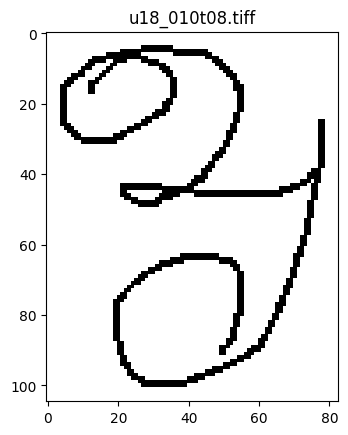

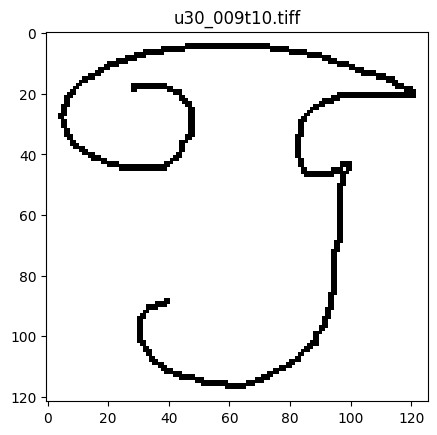

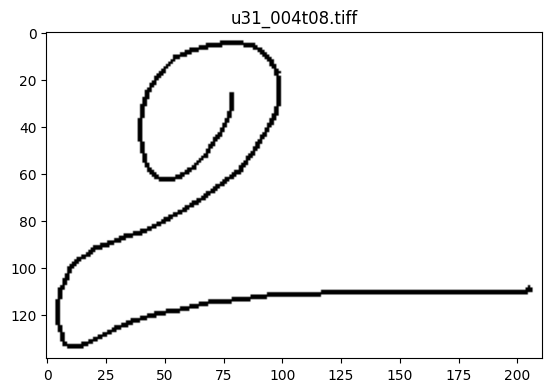

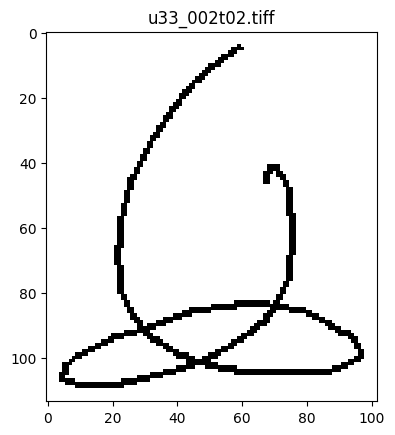

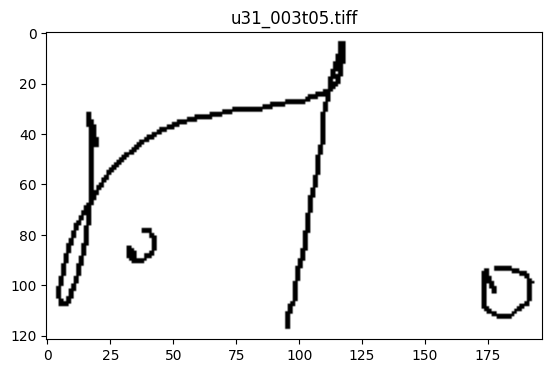

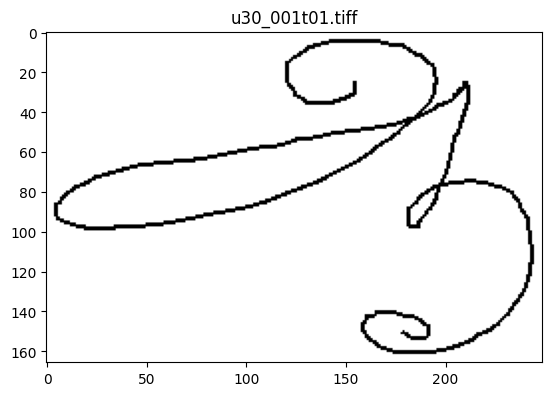

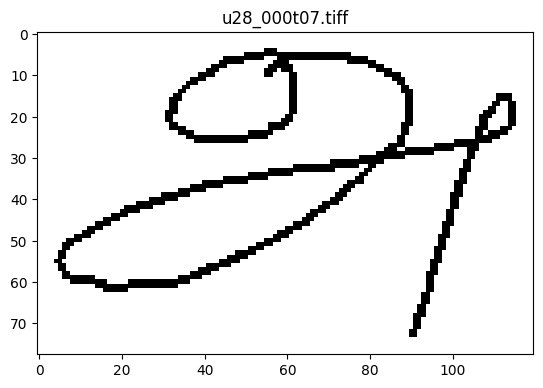

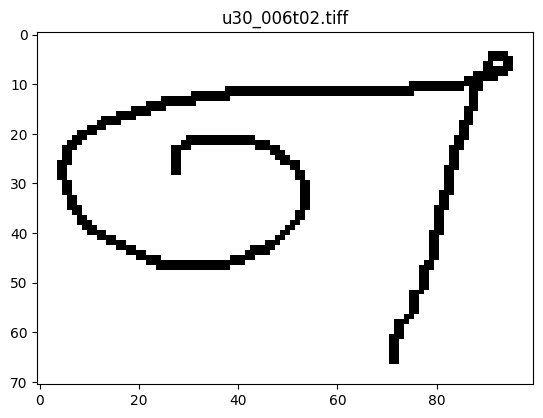

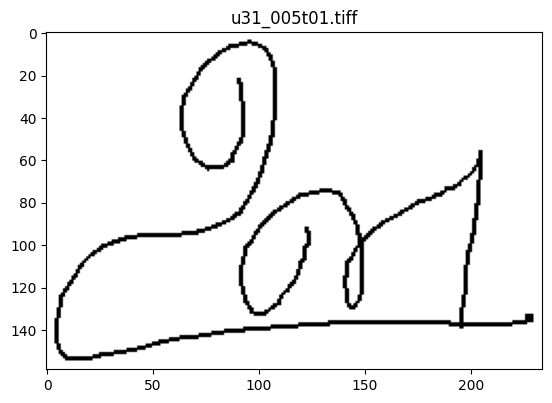

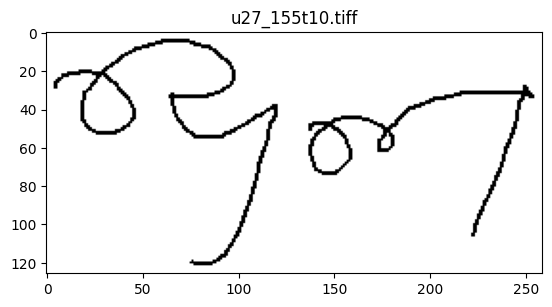

In [ ]:
# Iterate over each unique character category
for each in df['category'].unique():
    # Retrieve the filename of the first image belonging to the current category
    filename = df[df['category'] == each]['filename'].iloc[0] #iloc is used to select rows by integer index, and [0] means the first row.

    # Display the image
    plt.figure()
    img = mpimg.imread(os.path.join(TRAIN_PATH, filename))  # Read the image using matplotlib.image
    plt.imshow(img)  # Display the image
    plt.title(filename)  # Set the title as the filename
    plt.show()  # Show the image

### Map class with Unicode String

Creating a dictionary, that maps the class with the character's unicode string.

In [ ]:
# Map Tamil Character Category values to its equivalent Unicode characters
MAP = {
    '000':u'\u0B85',
    '001':u'\u0B86',
    '002':u'\u0B87',
    '003':u'\u0B88',
    '004':u'\u0B89',
    '005':u'\u0B8A',
    '006':u'\u0B8E',
    '007':u'\u0B8F',
    '008':u'\u0B90',
    '009':u'\u0B92',
    '010':u'\u0B93',
    '155':u'\u0B94'
    }

In [ ]:
MAP.items() # Returns a view object that displays a list of a dictionary's key-value pairs.

dict_items([('000', 'அ'), ('001', 'ஆ'), ('002', 'இ'), ('003', 'ஈ'), ('004', 'உ'), ('005', 'ஊ'), ('006', 'எ'), ('007', 'ஏ'), ('008', 'ஐ'), ('009', 'ஒ'), ('010', 'ஓ'), ('155', 'ஔ')])

Lets visualize the distribution of data in the dataset:

<Axes: xlabel='category'>

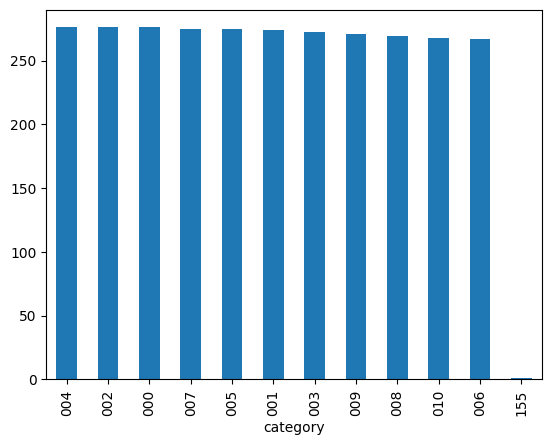

In [ ]:
# Generates a bar plot showing the count of each category in the DataFrame
df['category'].value_counts().plot.bar()

The data is not evenly distributed among all classes, and class '155' has only one image associated with it in the dataset.

So, Let's remove this class due to insufficient data.

In [ ]:
# Drop the class with less data
df.drop(df[df['category'] == '155'].index, inplace = True)

In [ ]:
# Returns a Series containing counts of unique values in the 'category' column of the DataFrame `df`, with the categories as the index.
df['category'].value_counts()

category
004    276
002    276
000    276
007    275
005    275
001    274
003    272
009    271
008    269
010    268
006    267
Name: count, dtype: int64

### Splitting the Data into Training and Validation Dataset

In [ ]:
# Split the DataFrame into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=28)

# Reset the index of the training and validation DataFrames
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

Train Dataset Size:  2399
Validation Dataset Size:  600


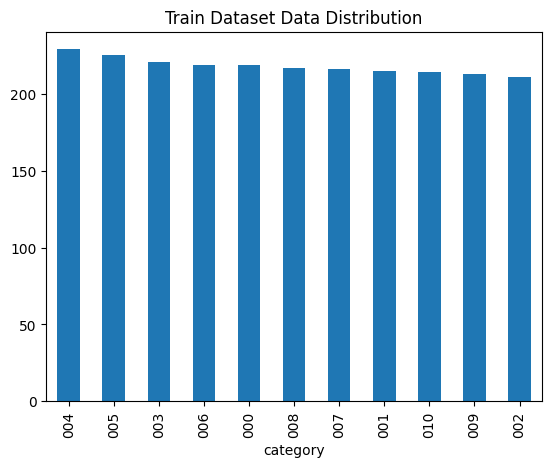

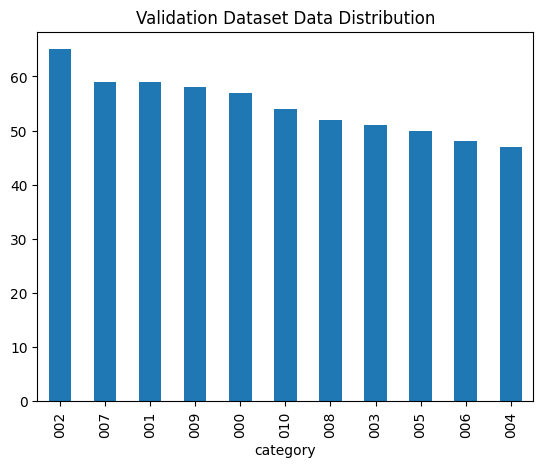

In [ ]:
# Print the size of the training and validation datasets
# Print the number of samples in the training dataset
print('Train Dataset Size: ', len(train_df))

 # Print the number of samples in the validation dataset
print('Validation Dataset Size: ', len(val_df))

# Plot the distribution of categories in the training dataset
# Plot a bar chart showing the distribution of categories in the training dataset
train_df['category'].value_counts().plot.bar()

# Set the title of the plot
plt.title('Train Dataset Data Distribution')
plt.show() # Show the plot

# Plot the distribution of categories in the validation dataset
plt.figure()
val_df['category'].value_counts().plot.bar()        # Plot a bar chart showing the distribution of categories in the validation dataset
plt.title('Validation Dataset Data Distribution')   # Set the title of the plot
plt.show()                                          # Show the plot

### Create Training and validation Image Data Generators

In [ ]:
# Set the batch size and number of epochs
batch_size = 5
epoch = 50

# Get the number of samples in the training and validation datasets
train_count = train_df.shape[0]  # Number of samples in the training dataset
val_count = val_df.shape[0]      # Number of samples in the validation dataset

# Define data augmentation for the training images
train_datagen = ImageDataGenerator(
    rescale=1./255,                 # Rescale pixel values to the range [0, 1]
    horizontal_flip=False,         # Random horizontal flipping
    fill_mode='nearest'            # Fill points outside the boundaries of input data using the nearest value
)

# Create a generator for the training dataset
train_gen = train_datagen.flow_from_dataframe(
    train_df,
    directory=TRAIN_PATH,
    x_col='filename',               # Column containing filenames
    y_col='category',               # Column containing labels
    class_mode='categorical',       # Classification mode for categorical labels
    target_size=IMAGE_SHAPE[:2],    # Target size for resizing images
    batch_size=batch_size,          # Batch size for training
    color_mode='grayscale'          # Color mode for images (grayscale)
)

# Create a generator for the validation dataset
val_gen = train_datagen.flow_from_dataframe(
    val_df,
    directory=TRAIN_PATH,
    x_col='filename',               # Column containing filenames
    y_col='category',               # Column containing labels
    class_mode='categorical',       # Classification mode for categorical labels
    target_size=IMAGE_SHAPE[:2],    # Target size for resizing images
    batch_size=batch_size,          # Batch size for validation
    color_mode='grayscale'          # Color mode for images (grayscale)
)

Found 2399 validated image filenames belonging to 11 classes.
Found 600 validated image filenames belonging to 11 classes.


## CNN Model

### Build a Deep Learning model with CNN

In [ ]:
def build_model():
  # Initialize a Sequential model
  model = models.Sequential()

  # Add a convolutional layer with 32 filters, each 5x5 in size, using ReLU activation function,
  # and specify the input shape as IMAGE_SHAPE
  model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=IMAGE_SHAPE))
  # Add a batch normalization layer to normalize the activations of the previous layer
  model.add(layers.BatchNormalization())
  # Add a max pooling layer with a pool size of 2x2
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  # Add a dropout layer to help prevent overfitting
  model.add(layers.Dropout(0.2))

  # Add another convolutional layer with 32 filters, each 5x5 in size, using ReLU activation function
  model.add(layers.Conv2D(32, (5, 5), activation='relu'))
  # Add another batch normalization layer
  model.add(layers.BatchNormalization())
  # Add another max pooling layer
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  # Add another dropout layer
  model.add(layers.Dropout(0.2))

  # Add another convolutional layer with 32 filters, each 5x5 in size, using ReLU activation function
  model.add(layers.Conv2D(32, (5, 5), activation='relu'))
  # Add another batch normalization layer
  model.add(layers.BatchNormalization())
  # Add another max pooling layer
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  # Add another dropout layer
  model.add(layers.Dropout(0.2))

  # Add another convolutional layer with 64 filters, each 6x6 in size, using ReLU activation function
  model.add(layers.Conv2D(64, (6, 6), activation='relu'))
  # Add another batch normalization layer
  model.add(layers.BatchNormalization())
  # Add another max pooling layer
  model.add(layers.MaxPool2D(pool_size=(2, 2)))
  # Add another dropout layer
  model.add(layers.Dropout(0.2))

  # Flatten the output of the previous layer
  model.add(layers.Flatten())
  # Add a fully connected dense layer with 256 units using ReLU activation function
  model.add(layers.Dense(256, activation='relu'))
  # Add another batch normalization layer
  model.add(layers.BatchNormalization())
  # Add the output layer with 11 units for the softmax function for classification
  model.add(layers.Dense(11, activation='softmax'))

  # Compile the model with categorical cross-entropy loss function, RMSprop optimizer, and accuracy metrics
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

# Build the model
model = build_model()

In [ ]:
# Load and preprocess training images

# Import the OpenCV library for image processing
import cv2

# Initialize an empty list to store training images
X_train = []

# Loop through each filename in the training dataset
for filename in train_df['filename']:
    # Read the image in grayscale using OpenCV
    img = cv2.imread(os.path.join(TRAIN_PATH, filename), cv2.IMREAD_GRAYSCALE)

    # Resize the image to match the specified shape (IMAGE_SHAPE)
    img = cv2.resize(img, (IMAGE_SHAPE[1], IMAGE_SHAPE[0]))

    # Append the preprocessed image to the list of training images
    X_train.append(img)

# Convert the list of preprocessed images to a numpy array
X_train = np.array(X_train)

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0

# Reshape the data to match the input shape of the model
X_train = np.expand_dims(X_train, axis=-1)  # Add a channel dimension for grayscale images

# Define y_train using the labels from the training dataframe
y_train = train_df['category'].values


Hybrid Model Implementation

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Train CNN model
history = model.fit(train_gen, epochs=epoch, validation_data=val_gen)

# Get the feature representation from the last convolutional layer of the CNN model
get_features = keras.Model(inputs=model.input, outputs=model.layers[-6].output)
X_train_features = get_features.predict(X_train)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Train SVM on extracted features
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_features.reshape(X_train_features.shape[0], -1), y_train_encoded)

# Evaluate the performance of the hybrid model
# Load and preprocess validation images
X_val = []  # List to store validation images
for filename in val_df['filename']:
    img = cv2.imread(os.path.join(TRAIN_PATH, filename), cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    img = cv2.resize(img, (IMAGE_SHAPE[1], IMAGE_SHAPE[0]))  # Resize the image to match IMAGE_SHAPE
    X_val.append(img)

X_val = np.array(X_val)  # Convert the list of images to numpy array
X_val = X_val.astype('float32') / 255.0  # Normalize pixel values to the range [0, 1]
X_val = np.expand_dims(X_val, axis=-1)  # Add a channel dimension for grayscale images

# Get features for validation data using the trained CNN
X_val_features = get_features.predict(X_val)

# Predict using SVM
y_pred_encoded = svm_model.predict(X_val_features.reshape(X_val_features.shape[0], -1))

# Decode predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
accuracy = accuracy_score(val_df['category'], y_pred)
print("Accuracy of the Hybrid Model: {:.2f}%".format(accuracy * 100))


Epoch 1/50
480/480 [==============================] - 14s 13ms/step - loss: 1.2267 - accuracy: 0.6098 - val_loss: 3.4558 - val_accuracy: 0.2800
Epoch 2/50
480/480 [==============================] - 6s 12ms/step - loss: 0.6324 - accuracy: 0.7928 - val_loss: 0.8262 - val_accuracy: 0.7017
Epoch 3/50
480/480 [==============================] - 6s 13ms/step - loss: 0.4453 - accuracy: 0.8483 - val_loss: 0.7636 - val_accuracy: 0.7550
Epoch 4/50
480/480 [==============================] - 5s 11ms/step - loss: 0.3822 - accuracy: 0.8649 - val_loss: 0.9791 - val_accuracy: 0.7033
Epoch 5/50
480/480 [==============================] - 6s 13ms/step - loss: 0.3370 - accuracy: 0.8883 - val_loss: 1.1636 - val_accuracy: 0.7183
Epoch 6/50
480/480 [==============================] - 5s 11ms/step - loss: 0.2792 - accuracy: 0.9141 - val_loss: 8.3669 - val_accuracy: 0.1833
Epoch 7/50
480/480 [==============================] - 6s 12ms/step - loss: 0.2290 - accuracy: 0.9233 - val_loss: 4.8062 - val_accuracy: 0.308

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(val_df['category'], y_pred)
print("Accuracy of the Hybrid Model: {:.2f}%".format(accuracy * 100))

# Calculate precision
precision = precision_score(val_df['category'], y_pred, average='weighted')
print("Precision of the Hybrid Model: {:.2f}".format(precision))

# Calculate recall
recall = recall_score(val_df['category'], y_pred, average='weighted')
print("Recall of the Hybrid Model: {:.2f}".format(recall))

# Calculate F1 score
f1 = f1_score(val_df['category'], y_pred, average='weighted')
print("F1 Score of the Hybrid Model: {:.2f}".format(f1))



Accuracy of the Hybrid Model: 97.17%
Precision of the Hybrid Model: 0.97
Recall of the Hybrid Model: 0.97
F1 Score of the Hybrid Model: 0.97


In [ ]:
# Save the hybrid model in H5 format
hybrid_model_path = 'hybrid_model.h5'
model.save(hybrid_model_path)

print("Hybrid model saved successfully as", hybrid_model_path)

Hybrid model saved successfully as hybrid_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
